In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Set up the data
data = np.concatenate(
    [[np.random.normal(loc=1, size=15), 15*['site1'], 15*['healthy']],
     [np.random.normal(loc=3, size=15), 15*['site2'], 15*['healthy']],
     [np.random.normal(loc=0, size=15), 15*['site3'], 15*['healthy']],
     [np.random.normal(loc=1, size=15), 15*['site1'], 15*['disease']],
     [np.random.normal(loc=1, size=15), 15*['site2'], 15*['disease']],
     [np.random.normal(loc=3, size=15), 15*['site3'], 15*['disease']]],
    axis=1)
df = pd.DataFrame(columns=['value', 'site', 'label'], data=data.T)
df['value'] = df['value'].astype(float)

# Show every ninth row
df.iloc[::9]


,value,site,label
0,0.810672,site1,healthy
9,1.296188,site1,healthy
18,3.092623,site2,healthy
27,2.473071,site2,healthy
36,-0.122051,site3,healthy
45,0.254554,site1,disease
54,2.668479,site1,disease
63,1.238683,site2,disease
72,-0.056926,site2,disease
81,4.040060,site3,disease


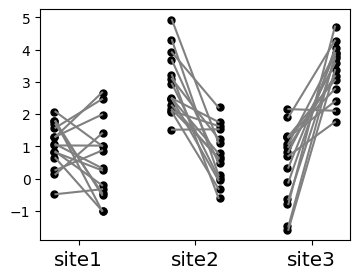

In [3]:
# BASIC SLOPEGRAPH
#_______________________________________________
fig, ax = plt.subplots(figsize=(4, 3))

# Set up list to track sites
sites = []
i = 1.0
for site, subdf in df.groupby('site'):
    sites.append(site)
    # Get the values for healthy and disease patients
    h = subdf.query('label == "healthy"')['value'].values
    d = subdf.query('label == "disease"')['value'].values

    # Set up the x-axis values
    x1 = i - 0.2
    x2 = i + 0.2

    # Plot the lines connecting the dots
    for hi, di in zip(h, d):
        ax.plot([x1, x2], [hi, di], c='gray')

    # Plot the points
    ax.scatter(len(h)*[x1-0.01], h, c='k',
               s=25, label='healthy')
    ax.scatter(len(d)*[x2+0.01], d, c='k',
               s=25, label='disease')


    # Update x-axis
    i += 1

# Fix the axes and labels
ax.set_xticks([1, 2, 3])
_ = ax.set_xticklabels(sites, fontsize='x-large')


## Get Fancier
- add some bells and whistles:

- Change the color of the points to indicate healthy [blue] or disease [red].
- Color the lines according to their slopes: blue if higher in healthy, red if higher in disease
- Add a legend

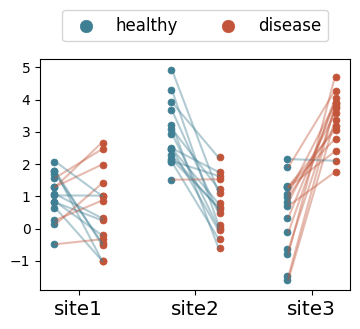

In [4]:
# GET FANCIER
#_______________________________________________
""" 
add some bells and whistles:

Change the color of the points to indicate healthy [blue] or disease [red].
Color the lines according to their slopes: blue if higher in healthy, red if higher in disease
Add a legend
"""

red = '#C25539'
blue = '#3F7F93'

fig, ax = plt.subplots(figsize=(4, 3))

# Set up list to track sites
sites = []
i = 1.0
for site, subdf in df.groupby('site'):
    sites.append(site)
    # Get the values for healthy and disease patients
    h = subdf.query('label == "healthy"')['value'].values
    d = subdf.query('label == "disease"')['value'].values

    # Set up the x-axis values
    x1 = i - 0.2
    x2 = i + 0.2

    # Set up line color
    line_colors = (h - d) > 0
    line_colors = [blue if j else red for j in line_colors]

    # Also set up alpha values to make the lines slightly transparent
    alphas = [0.4]*len(line_colors)

    # Plot the lines connecting the dots
    for hi, di, ci, ai in zip(h, d, line_colors, alphas):
        ax.plot([x1, x2], [hi, di], c=ci, alpha=ai)

    # Plot the points
    # Note: s=25 increase the default point size, lw=0.5 decreases the default
    # point line width
    ax.scatter(len(h)*[x1-0.01], h, c=blue,
               s=25, lw=0.5, label='healthy')
    ax.scatter(len(d)*[x2+0.01], d, c=red,
               s=25, lw=0.5, label='disease')

    # Update x-axis
    i += 1

# Fix the axes and labels
ax.set_xticks([1, 2, 3])
_ = ax.set_xticklabels(sites, fontsize='x-large')

# Add legend and fix it to show only the first two elements
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], labels[0:2],   
                fontsize='large',
                loc='upper center',
                bbox_to_anchor=(0.5, 1.25),
                ncol=2,
                scatterpoints=1)
# Manually update sizes for legend scatter handles (if present)
for lh in lgd.legend_handles:
    if hasattr(lh, 'set_sizes'):
        lh.set_sizes([80])


## More complex
Add a boxplot to the graph though not advisable

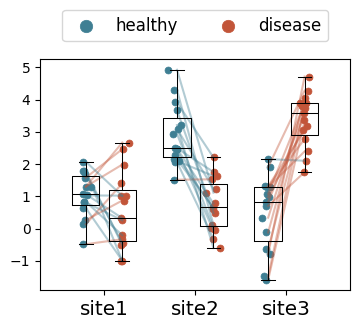

In [5]:
# MORE COMPLEX
#_______________________________________________
"""
Add a boxplot to the graph though not advisable
"""
red = '#C25539'
blue = '#3F7F93'

fig, ax = plt.subplots(figsize=(4, 3))

# Set up list to track sites
sites = []
# Set up lists to track boxplot data
for_boxplot = []
positions = []

i = 1.0
for site, subdf in df.groupby('site'):
    sites.append(site)

    # Get the values for healthy and disease patients
    h = subdf.query('label == "healthy"')['value'].values
    d = subdf.query('label == "disease"')['value'].values

    # Set up the x-axis values
    x1 = i - 0.2
    x2 = i + 0.2

    ## Track values for one call to boxplot after the loop
    # Add the healthy (left) values first
    for_boxplot.append(h)
    # and disease (right) values next
    for_boxplot.append(d)    

    # And track positions
    positions += [x1, x2]

    # Set up line color
    line_colors = (h - d) > 0
    line_colors = [blue if j else red for j in line_colors]

    # Also set up alpha values to make the lines slightly transparent
    alphas = [0.4]*len(line_colors)

    # Plot the lines connecting the dots
    for hi, di, ci, ai in zip(h, d, line_colors, alphas):
        ax.plot([x1, x2], [hi, di], c=ci, alpha=ai)

    # Plot the points

    # Set up some noise for jitter
    noise = np.random.normal(loc=0, scale=0.025, size=len(h))

    ax.scatter(len(h)*[x1-0.01] + noise, h, c=blue,
               s=25, lw=0.5, label='healthy')
    ax.scatter(len(d)*[x2+0.01] + noise, d, c=red,
               s=25, lw=0.5, label='disease')

    # Update x-axis
    i += 1

## Overlay boxplot
# Set up some parameters for the boxplot
boxprops = {'linewidth': 0.75, 'color': 'k'}
lineprops = {'linewidth': 0.75, 'color': 'k', 'linestyle': '-'}

boxplot_kwargs = dict({'boxprops': boxprops, 'medianprops': lineprops,
                       'whiskerprops': lineprops, 'capprops': lineprops})
bp = ax.boxplot(for_boxplot, positions=positions,
                widths=0.3, **boxplot_kwargs)       

# Fix the axes and labels
ax.set_xticks([1, 2, 3])
_ = ax.set_xticklabels(sites, fontsize='x-large')

# Add legend and fix it to show only the first two elements
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], labels[0:2],   
              fontsize='large',
              loc='upper center',
              bbox_to_anchor=(0.5, 1.25),
              ncol=2,
              scatterpoints=1)
# Make the points in the legend larger
# lgd.legendHandles[0]._sizes = [80]
# lgd.legendHandles[1]._sizes = [80]


# Manually update sizes for legend scatter handles (if present)
for lh in lgd.legend_handles:
    if hasattr(lh, 'set_sizes'):
        lh.set_sizes([80])

